In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
 
    
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

print("Number of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')), "\n")

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# train_data_dir = 'D:\\recep_roof_fine_tune\\output\\train' ####################################
test_data_dir = 'D:\\recep_roof_fine_tune\\output\\test'

num_classes = 6
batch_size = 64
img_height = 140
img_width = 140
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=0.1,
  zoom_range=0.1,    
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,
  validation_split=0.2
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


test_ds = test_datagen.flow_from_directory(
    test_data_dir,
    seed=94,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
shuffle=False)

Number of GPUs Available:  1 

Found 1000 images belonging to 6 classes.


In [19]:
import itertools
def plot_confusion_matrix(cm, classes=['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from tensorflow.keras.models import load_model

# vgg16_model_fine_tuned = load_model("VGG16_cce_final")
# resnet50_model_fine_tuned = load_model("resnet50_final_cce")
# inceptionv3 = load_model("inceptionv3_cce_final")
# efficientnetb4 = load_model("efficientnetb4_final_cce")

In [4]:
mrc = load_model('mehmet_abis_and_rc_model')

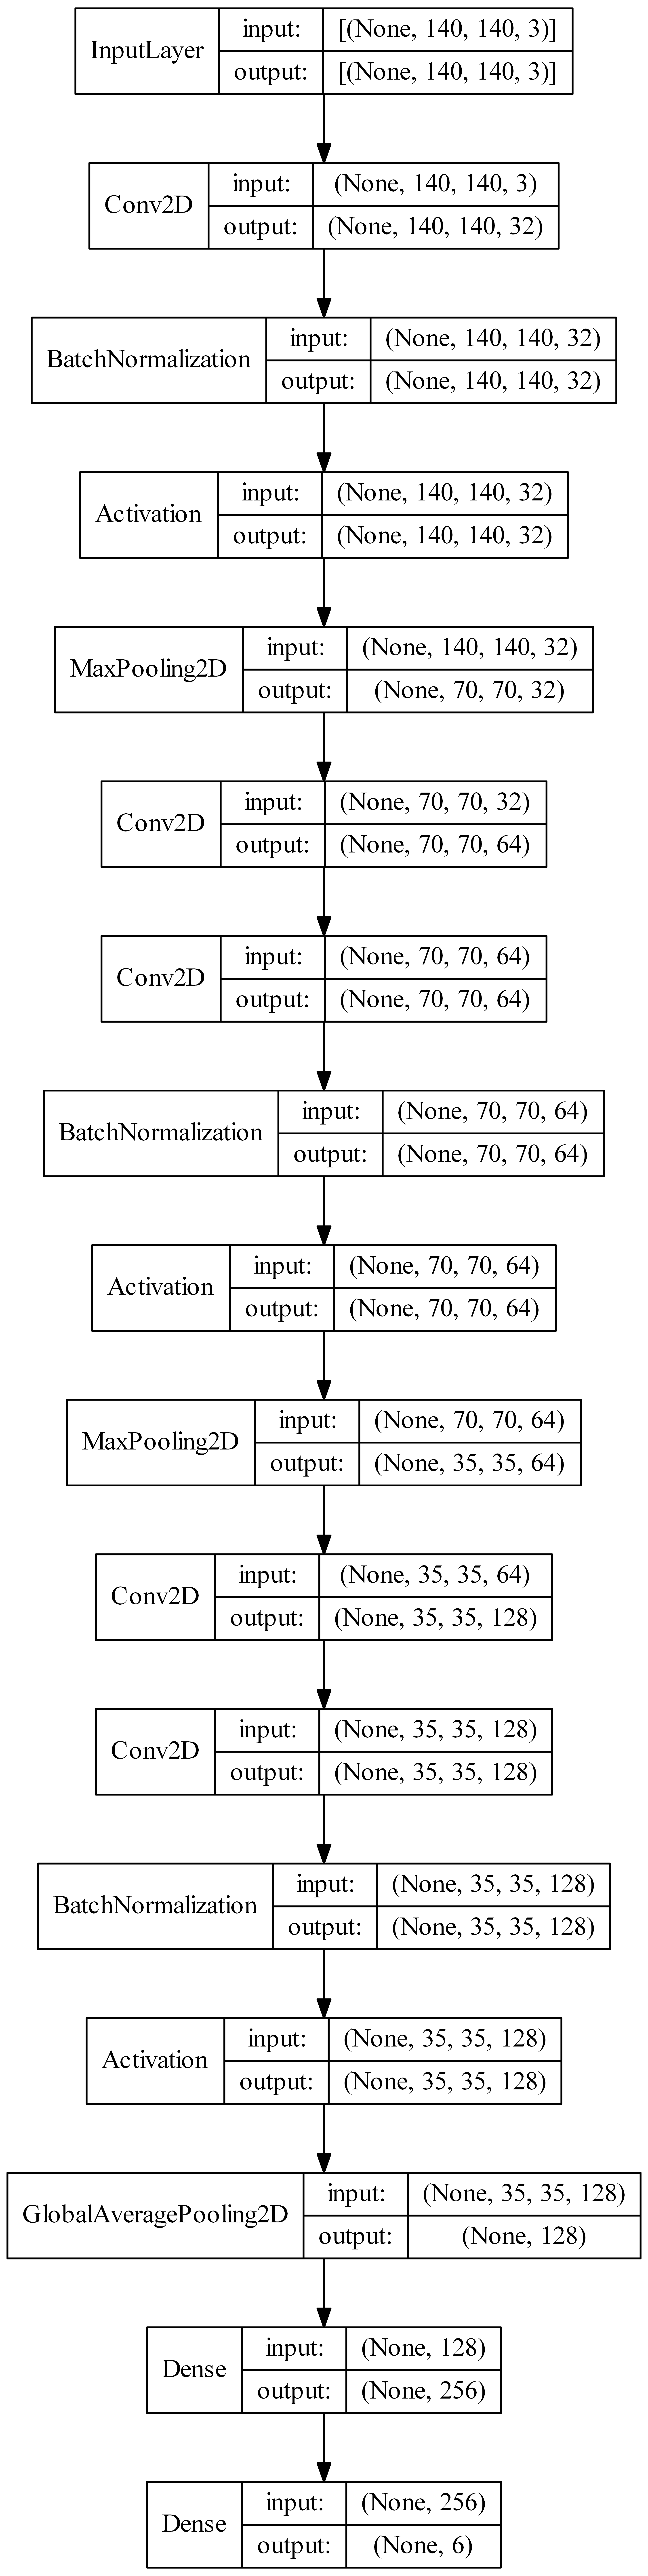

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(mrc, to_file="our_model.png", show_layer_names=False, show_shapes=True, dpi=600)

In [6]:
import pydot

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(mrc, to_file="our_model.png", show_shapes=True, dpi=600)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [45]:
epochs = 150
epochs_range = range(epochs)
modelhistory = mrc.history.history

plt.figure(figsize=(12, 12))
plt.plot(epochs_range, modelhistory['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, modelhistory['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs_range, modelhistory['loss'], label='Training Loss')
plt.plot(epochs_range, modelhistory['val_loss'], label='Validation Loss')
plt.legend(loc='upper right', fontsize=('xx-large'))
plt.xlabel('Epochs', fontsize=('27'))
plt.ylabel('Value', fontsize=('27'))
plt.title('Training and Validation Results', fontsize=('27'))
plt.savefig("mehmetabis_rc_model.jpeg", dpi=600) ####################################
plt.show()

KeyError: 'accuracy'

In [34]:
m = load_model('mehmet_abis_model')

In [39]:
#mehmet_abis_model
test_labels = test_ds.classes
test_labels = to_categorical(test_labels, num_classes=6)
predictions = m.predict(test_ds, batch_size=64, verbose=1)

print(classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1), target_names=['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid']))

16/16 [==============================] - 3s 191ms/step
              precision    recall  f1-score   support

     complex       0.80      0.83      0.81       225
        flat       0.87      0.81      0.84       175
       gable       0.81      0.87      0.84       175
     halfhip       0.61      0.73      0.67       100
         hip       0.80      0.62      0.70       175
     pyramid       0.78      0.83      0.81       150

    accuracy                           0.79      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.79      0.79      0.79      1000



In [41]:
ma_cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
%matplotlib qt
plt.figure()
plot_confusion_matrix(ma_cm, title='MA Model - Normalized Confusion Matrix', normalize=True)
plt.savefig("ma_cm.jpeg", dpi=600) ####################################

Normalized confusion matrix
[[0.83111111 0.03555556 0.03555556 0.01333333 0.04888889 0.03555556]
 [0.06857143 0.81142857 0.10857143 0.00571429 0.         0.00571429]
 [0.04       0.05142857 0.87428571 0.01714286 0.00571429 0.01142857]
 [0.11       0.02       0.05       0.73       0.07       0.02      ]
 [0.05714286 0.01142857 0.02285714 0.16571429 0.62285714 0.12      ]
 [0.04666667 0.         0.00666667 0.06666667 0.05333333 0.82666667]]


In [50]:
#mehmet_abis_and_rc_model
test_labels = test_ds.classes
test_labels = to_categorical(test_labels, num_classes=6)
predictions = mrc.predict(test_ds, batch_size=64, verbose=1)

print(classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1), target_names=['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid']))

16/16 [==============================] - 3s 200ms/step
              precision    recall  f1-score   support

     complex       0.87      0.80      0.83       225
        flat       0.89      0.84      0.86       175
       gable       0.76      0.86      0.81       175
     halfhip       0.74      0.62      0.67       100
         hip       0.78      0.75      0.76       175
     pyramid       0.73      0.86      0.79       150

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.80      0.80      0.80      1000



In [51]:
mrc_cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
%matplotlib qt
plt.figure()
plot_confusion_matrix(mrc_cm, title='Proposed CNN Architecture - Normalized Confusion Matrix', normalize=True)
plt.savefig("mrc_cm.jpeg", dpi=600) ####################################

Normalized confusion matrix
[[0.8        0.02666667 0.07111111 0.01777778 0.04       0.04444444]
 [0.03428571 0.84       0.11428571 0.01142857 0.         0.        ]
 [0.03428571 0.05714286 0.86285714 0.03428571 0.00571429 0.00571429]
 [0.07       0.01       0.04       0.62       0.18       0.08      ]
 [0.01142857 0.00571429 0.03428571 0.03428571 0.74857143 0.16571429]
 [0.04666667 0.         0.00666667 0.02666667 0.06       0.86      ]]


In [28]:
#efficientnetb4
test_labels = test_ds.classes
test_labels = to_categorical(test_labels, num_classes=6)
predictions = efficientnetb4.predict(test_ds, batch_size=64, verbose=1)

print(classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1), target_names=['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid']))

16/16 [==============================] - 6s 178ms/step
              precision    recall  f1-score   support

     complex       0.85      0.77      0.81       225
        flat       0.82      0.83      0.83       175
       gable       0.79      0.88      0.83       175
     halfhip       0.85      0.81      0.83       100
         hip       0.82      0.81      0.81       175
     pyramid       0.84      0.89      0.87       150

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



In [29]:
efficientb4_cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
%matplotlib qt
plt.figure()
plot_confusion_matrix(efficientb4_cm, title='Fine Tuned EfficientNetB4 - Normalized Confusion Matrix', normalize=True)
plt.savefig("efficientb4_cm.jpeg", dpi=600) ####################################

Normalized confusion matrix
[[0.76888889 0.07111111 0.04       0.02666667 0.06222222 0.03111111]
 [0.02285714 0.83428571 0.13714286 0.00571429 0.         0.        ]
 [0.02857143 0.08       0.88       0.00571429 0.00571429 0.        ]
 [0.05       0.         0.02       0.81       0.08       0.04      ]
 [0.06285714 0.00571429 0.02857143 0.01714286 0.80571429 0.08      ]
 [0.03333333 0.         0.         0.02       0.05333333 0.89333333]]


In [13]:
#VGG16
test_labels = test_ds.classes
test_labels = to_categorical(test_labels, num_classes=6)
predictions = vgg16_model_fine_tuned.predict(test_ds, batch_size=64, verbose=1)

print(classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1), target_names=['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid']))

16/16 [==============================] - 1s 81ms/step
              precision    recall  f1-score   support

     complex       0.90      0.80      0.84       225
        flat       0.81      0.93      0.86       175
       gable       0.90      0.84      0.87       175
     halfhip       0.82      0.80      0.81       100
         hip       0.83      0.92      0.87       175
     pyramid       0.94      0.89      0.91       150

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [23]:
vgg16_cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
%matplotlib qt
plt.figure()
plot_confusion_matrix(vgg16_cm, title='Fine Tuned VGG16 - Normalized Confusion Matrix', normalize=True)
plt.savefig("vgg16_cm.jpeg", dpi=600) ####################################

Normalized confusion matrix
[[0.79555556 0.07555556 0.02666667 0.03555556 0.05333333 0.01333333]
 [0.01142857 0.93142857 0.05142857 0.00571429 0.         0.        ]
 [0.02857143 0.10285714 0.84       0.02285714 0.00571429 0.        ]
 [0.06       0.01       0.         0.8        0.12       0.01      ]
 [0.01714286 0.01714286 0.01142857 0.00571429 0.92       0.02857143]
 [0.03333333 0.         0.         0.02       0.06       0.88666667]]


In [24]:
#RESNET50
test_labels = test_ds.classes
test_labels = to_categorical(test_labels, num_classes=6)
predictions = resnet50_model_fine_tuned.predict(test_ds, batch_size=64, verbose=1)

print(classification_report(test_labels.argmax(axis=1), predictions.argmax(axis=1), target_names=['complex', 'flat', 'gable', 'halfhip', 'hip', 'pyramid']))

16/16 [==============================] - 1s 86ms/step
              precision    recall  f1-score   support

     complex       0.86      0.79      0.82       225
        flat       0.84      0.85      0.85       175
       gable       0.82      0.88      0.85       175
     halfhip       0.89      0.85      0.87       100
         hip       0.81      0.86      0.83       175
     pyramid       0.90      0.88      0.89       150

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



In [25]:
resnet50_cm = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
%matplotlib qt
plt.figure()
plot_confusion_matrix(resnet50_cm, title='Fine Tuned ResNet50 - Normalized Confusion Matrix', normalize=True)
plt.savefig("resnet50_cm.jpeg", dpi=600) ####################################

Normalized confusion matrix
[[0.79111111 0.05333333 0.04888889 0.01777778 0.07111111 0.01777778]
 [0.03428571 0.85142857 0.10857143 0.00571429 0.         0.        ]
 [0.03428571 0.06857143 0.88       0.00571429 0.00571429 0.00571429]
 [0.05       0.02       0.         0.85       0.07       0.01      ]
 [0.05142857 0.01142857 0.01714286 0.01142857 0.86285714 0.04571429]
 [0.02666667 0.         0.         0.01333333 0.08       0.88      ]]
